# Lecture 21

## Ensemble Learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

What's your philosophy?

- Suppose you pose a complex question to thousands of random people, then aggregate their answers.
    - This is called the **wisdom of the crowd**
- What's your thoughts: one expert's answer vs. wisdom of the crowd

- If you aggregate the predictions of a group of predictors (such as classifiers or regressors), you will often get better predictions than with the best individual predictor
- A group of predictors is called an **ensemble**; thus, this technique is called **ensemble learning**, and an ensemble learning algorithm is called an **ensemble method**.

- Example:
    - You can train a group of decision tree classifiers, each on a different random subset of the training set
    - You can then obtain the predictions of all the individual trees, and the class that gets the most votes is the ensemble's prediction
        - Such an ensemble of decision trees is called a **random forest**, and despite its simplicity, this is one of the most powerful machine learning algorithms available today.

You will often use ensemble methods near the end of a project, once you have already built a few good predictors, to combine them into an even better predictor.

In fact, the winning solutions in machine learning competitions often involve several ensemble methods

## Bagging

To implement a random forest, we need to understand some sampling methods

- We need to have a diverse set of classifiers (a group of decision tree classifiers)
- The idea is:
    - use the same training algorithm for every predictor but train them on different random subsets of the training set

- When sampling is performed with replacement, this method is called **bagging** (short for bootstrap aggregating).
- When sampling is performed without replacement, it is called **pasting**.⁠

- To illustrate, let's say we want to create a bootstrap sample of the list `['a', 'b', 'c', 'd']`.
    - A possible bootstrap sample would be `['b', 'd', 'd', 'c']`.
    - Another possible sample would be `['d', 'a', 'd', 'a']`.

In other words, both bagging and pasting allow training instances to be sampled several times across multiple predictors, but only bagging allows training instances to be sampled several times for the same predictor

In [ ]:
from IPython.display import Image
Image(url="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0704.png", width=800)

- Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors
    - the statistical mode for classification
    - the average for regression

- Generally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set.
    - can be shown using rigorous mathematics

## Random Forests

- A random forest is essentially a collection of decision trees, where each tree is slightly different from the others
    - an ensemble of decision trees, generally trained via the bagging method
- You can use the `RandomForestClassifier` class, which is more convenient and optimized for decision trees
    - similarly, there is a `RandomForestRegressor` class for regression tasks

Let's apply a random forest to the `two_moons` dataset we studied earlier:

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

- The following code trains an ensemble of 500 decision tree classifiers:
    - each is trained on 100 training instances randomly sampled from the training set with replacement
    - this is an example of bagging, but if you want to use pasting instead, just set `bootstrap=False`

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_samples=100,
                                 n_jobs=-1,
                                 random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_samples=100, n_estimators=500, n_jobs=-1,
                       random_state=42)

- The trees that are built as part of the random forest are stored in the `estimator_ attribute`
- The `n_jobs` parameter tells Scikit-Learn the number of CPU cores to use for training and predictions, and `–1` tells Scikit-Learn to use all available cores

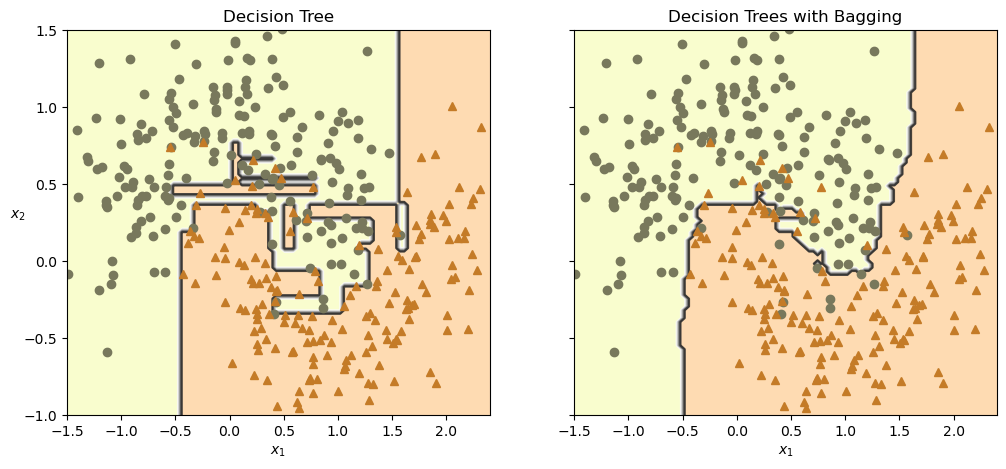

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def plot_decision_boundary(clf, X, y, alpha=1.0):
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(rnd_clf, X_train, y_train)
plt.title("Decision Trees with Bagging")
plt.ylabel("")
plt.show()

- Figure compares the decision boundary of a single decision tree with the decision boundary of a bagging ensemble of 500 trees, both trained on the moons dataset
- As you can see, the ensemble's predictions will likely generalize much better than the single decision tree’s predictions
    - the ensemble has a comparable bias but a smaller variance
    - it makes roughly the same number of errors on the training set, but the decision boundary is less irregular

- Bagging introduces a bit more diversity in the subsets that each predictor is trained on, so bagging ends up with a slightly higher bias than pasting
    - but the extra diversity also means that the predictors end up being less correlated, so the ensemble’s variance is reduced
- Overall, bagging often results in better models, which explains why it’s generally preferred

As another example, let’s apply a random forest consisting of 100 trees on the Breast Cancer dataset:

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.972


- The random forest gives us an accuracy of 97%, better than the linear models or a single decision tree, without tuning any parameters
- We could adjust the `max_features` setting
    - It work the same way as `max_samples`, but for feature sampling instead of instance sampling.
    - Thus, each predictor will be trained on a random subset of the input features.
- However, often the default parameters of the random forest already work quite well.

- Similarly to the decision tree, the random forest provides feature importances, which are computed by aggregating the feature importances over the trees in the forest
- Typically, the feature importances provided by the random forest are more reliable than the ones provided by a single tree

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

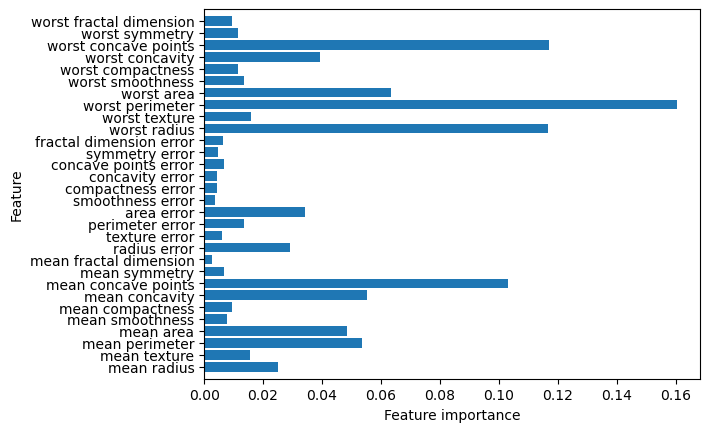

In [ ]:
plot_feature_importances_cancer(forest)

- As you can see, the random forest gives nonzero importance to many more features than the single tree
- Similarly to the single decision tree, the random forest also gives a lot of importance to the *worst radius* feature, but it actually chooses *worst perimeter* to be the most informative feature overall
- The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree

### Strengths, weaknesses, and parameters

- Random forests for regression and classification are currently among the most widely used machine learning methods.
- They are very powerful, often work well without heavy tuning of the parameters, and don't require scaling of the data.

Any reason to use a decision tree then?

- One reason to still use decision trees is if you need a compact representation of the decision-making process.
- It is basically impossible to interpret tens or hundreds of trees in detail, and trees in random forests tend to be deeper than decision trees (because of the use of feature subsets).
- Therefore, if you need to summarize the prediction making in a visual way to nonexperts, a single decision tree might be a better choice.

- You should keep in mind that random forests  are **random**, and setting different random states (or not setting the `random_state` at all) can drastically change the model that is built.
- The more trees there are in the forest, the more robust it will be against the choice of random state.
- If you want to have reproducible results, it is important to fix the `random_state`.

Random forests don’t tend to perform well on very high dimensional, sparse data, such as text data. Why?

- The important parameters to adjust are `n_estimators`, `max_features`, and possibly pre-pruning options like `max_depth`.
- For `n_estimators`, larger is always better.
    - Averaging more trees will yield a more robust ensemble by reducing overfitting.
    - However, there are diminishing returns, and more trees need more memory and more time to train. A common rule of thumb is to build “as many as you have time/memory for.”
- `max_features` determines how random each tree is, and a smaller `max_features` reduces overfitting.
    - In general, it’s a good rule of thumb to use the default values
        - `max_features=sqrt(n_features)` for classification and `max_features=n_features` for regression.
- Adding `max_features` or `max_leaf_nodes` might sometimes improve performance.
    - It can also drastically reduce space and time requirements for training and prediction.

# Discussion

Suppose we produce ten bootstrapped samples from a data set containing **red** and **green** classes.

We then apply a classification tree to each bootstrapped sample and, for a specific value of $X$, produce 10 estimates of
$$P(\text{Class is Red}|X): .1, .15, .2, .2, .55, .6, .6, .65, .7, .75.$$

There are two common ways to combine these results together into a single class prediction.

1. One is the majority vote approach discussed in this chapter.
2. The second approach is to classify based on the average probability.

In this example, what is the final classification under each of these two approaches?